✅ Ambiente configurado e dependências instaladas!
✅ Design System 'Dark Neon' ativado!

>>> Iniciando download: BR...
   Baixando 2021...
Dataset URL: https://www.kaggle.com/datasets/datahackers/state-of-data-2021
   -> OK: 2645 linhas
   Baixando 2022...
Dataset URL: https://www.kaggle.com/datasets/datahackers/state-of-data-2022
   -> OK: 4271 linhas
   Baixando 2023...
Dataset URL: https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-2023
   -> OK: 5293 linhas
   Baixando 2024...
Dataset URL: https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-20242025
   -> OK: 5217 linhas

>>> Iniciando download: GL...
   Baixando 2021...
Dataset URL: https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2021-developers-survey
   -> OK: 83439 linhas
   Baixando 2022...
Dataset URL: https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2022-developers-survey
   -> OK: 73268 linhas
   Baixando 2023...
Dataset URL: https://www.kaggle.com/datasets/stackoverflow/st


    💡 Insight:
    A região Sudeste apresenta a maior média de salários, indicando forte concentração de oportunidades e remuneração mais elevada.
    



    💡 Insight:
    O salário aumenta conforme o nível de senioridade. Juniores recebem salário significativamente menor comparado a Pleno e Sênior.
    


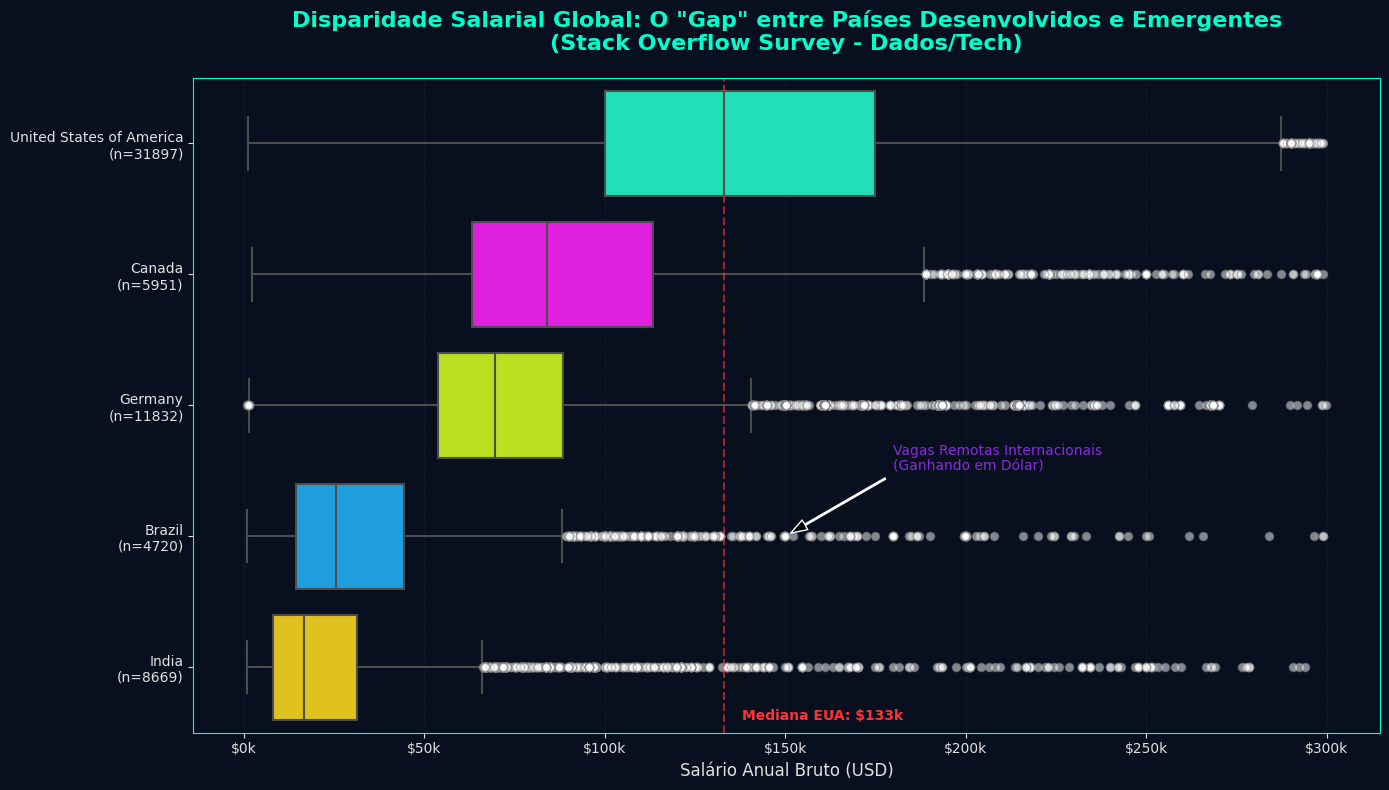

📊 Principais Insights do Gráfico

1. A Hegemonia Americana: O piso salarial (25º percentil) dos EUA é maior que o teto da maioria dos países.
2. O "Sonho da Vaga Remota": Outliers brasileiros com altos salários são minoria privilegiada que trabalha remotamente para o exterior.
3. Brasil vs. Índia: Brasil supera Índia em mediana salarial na área de tech exportação.




    💡 Insight:
    A maioria dos Engenheiros de Dados está concentrada no nível Pleno e Sênior, refletindo maturidade do mercado brasileiro em tech.
    


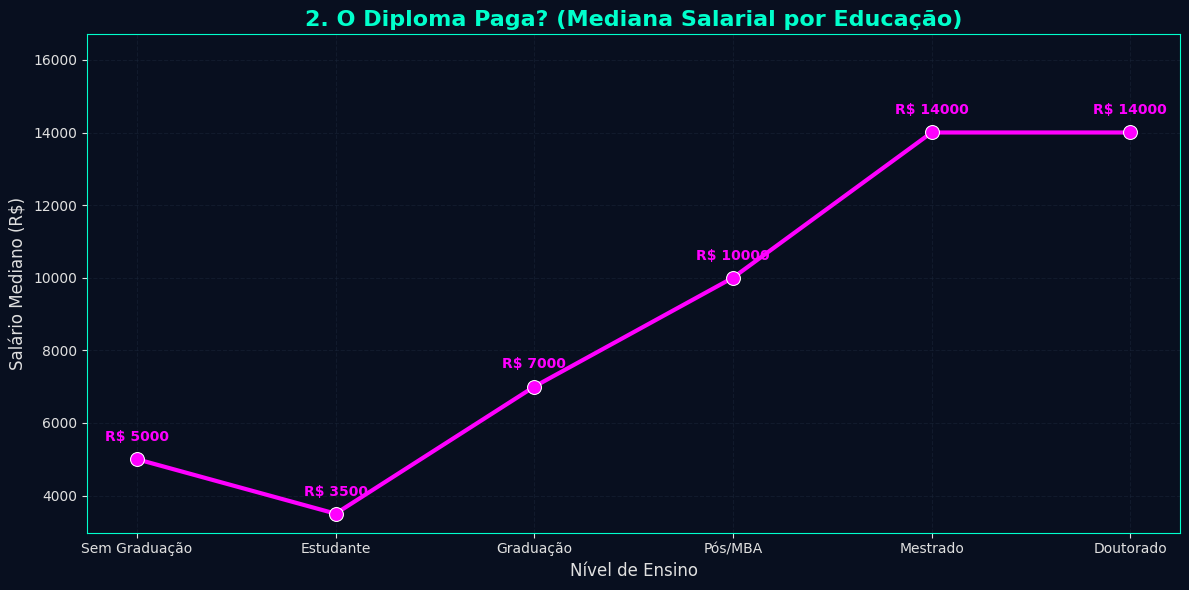


💡 Insight:
A curva salarial cresce até Mestrado/MBA. O Doutorado pode estagnar ou cair em salários do mercado privado, sendo mais valorizado na área acadêmica/pesquisa.



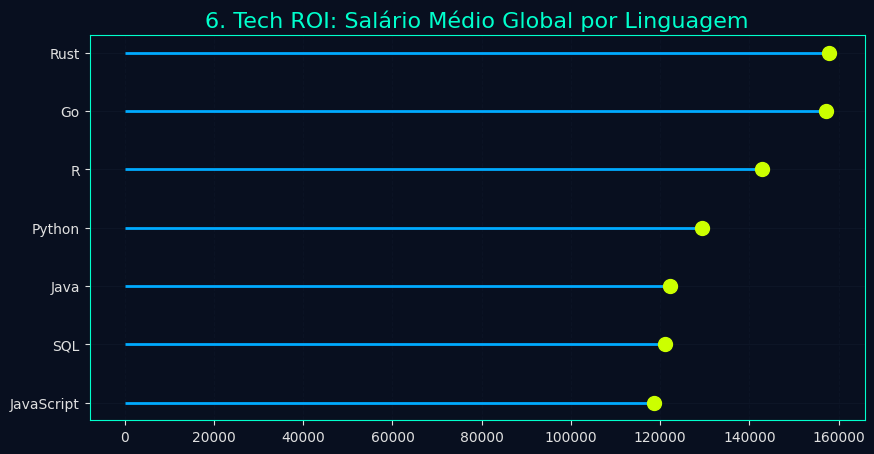


    💡 Insight:
    Linguagens como Go e Rust apresentam maior salário médio, mas Python domina em volume de vagas.
    


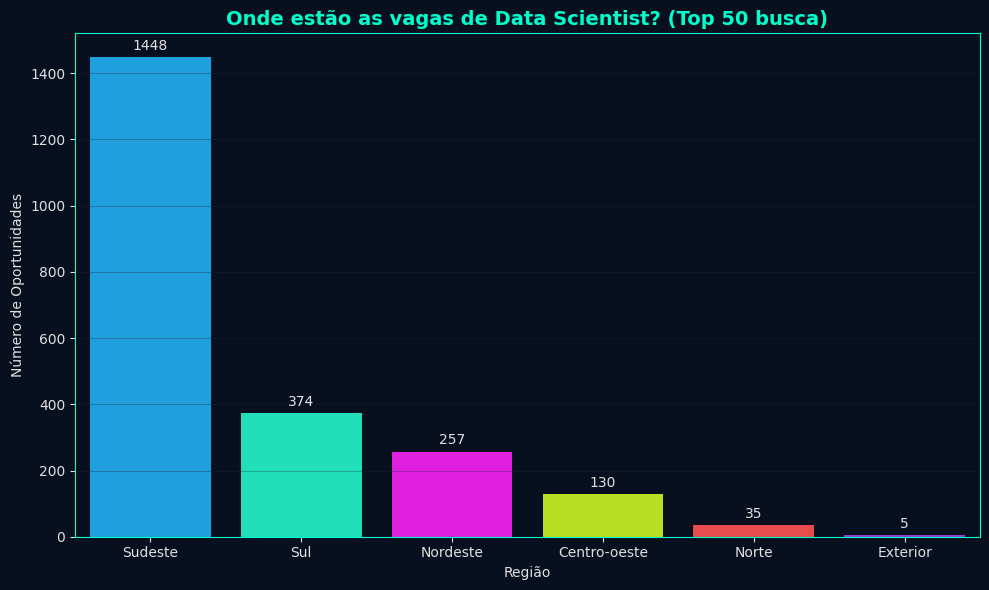


💡 Insight:

Concentração Sudeste: A maioria das vagas está no Sudeste (SP/RJ). Remoto ampliou oportunidades para outras regiões, mas presencial e híbrido ainda concentram no eixo.




    💡 Insight:
    Cientistas de Dados têm, em média, maior faixa salarial em relação a analistas, mas com maior variação de valores.
    



    💡 Insight:
    Os salários crescem de acordo com a senioridade, especialmente na região Sudeste.
    



    💡 Insight:
    Ainda existe uma diferença salarial significativa entre gêneros, evidenciada pelo pico salarial masculino.
    



    💡 Insight:
    O modelo remoto apresenta salários mais homogêneos e elevados que os modelos presencial ou híbrido.
    


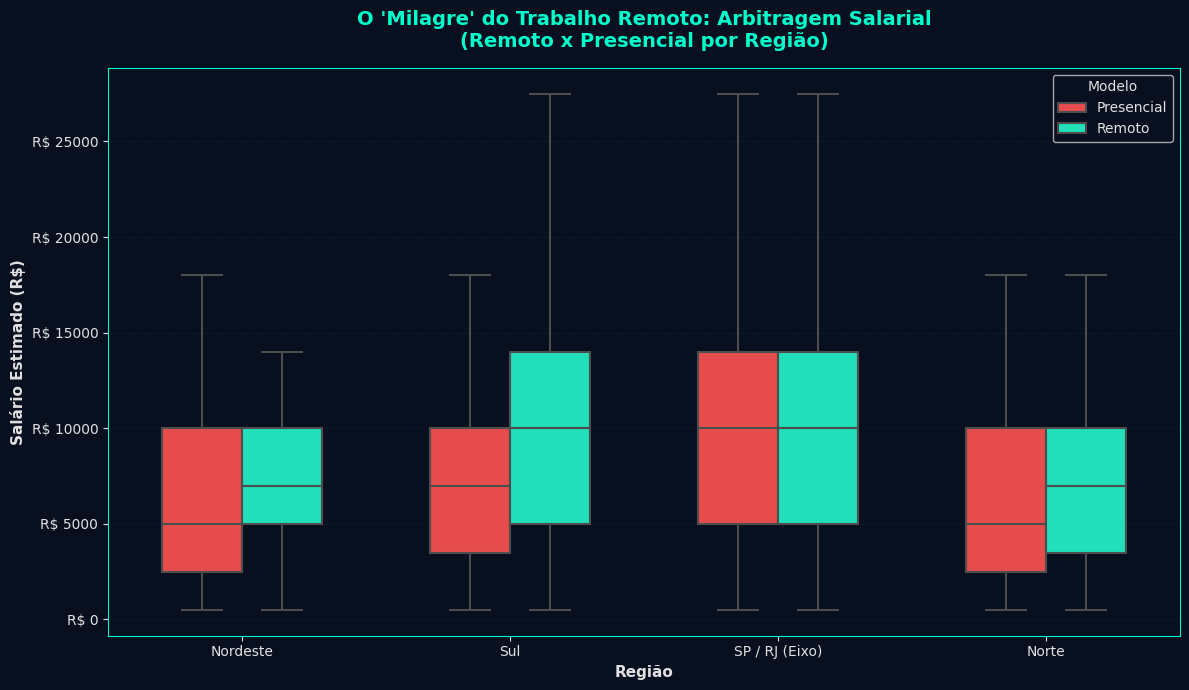

💡 Insights:

1. Salário remoto é estável em todas as regiões: CEP não reduz salário para trabalho remoto.
2. Presencial sofre forte depreciação salarial fora do eixo SP-RJ.
3. Arbitragem salarial: no Norte/Nordeste, remoto paga até o dobro do presencial local.



In [ ]:
# ==============================================================================
# 1. AMBIENTE E CONFIGURAÇÃO (ESPECIAL PARA GOOGLE COLAB)
# ==============================================================================

# Instalação silenciosa de dependências no Colab
try:
    import google.colab
    %pip install -q pandas requests kaggle matplotlib seaborn scikit-learn rank-bm25 plotly wordcloud
except Exception:
    pass  # Fora do Colab, ignora instalação automática

import os
import pandas as pd
import numpy as np
import requests
import json
import zipfile
import io
import re
import warnings

# Bibliotecas de Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rank_bm25 import BM25Okapi

nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)
stopwords_pt = stopwords.words("portuguese")
stopwords_en = stopwords.words("english")
warnings.filterwarnings('ignore')

print("✅ Ambiente configurado e dependências instaladas!")

# ==============================================================================
# 2. DESIGN SYSTEM: TEMA DARK NEON (CYBERPUNK)
# ==============================================================================

NEON_PALETTE = [
    "#00FFCC", "#FF00FF", "#CCFF00", "#00AAFF", "#FFD700", "#FF3333", "#8A2BE2"
]
BG_COLOR = "#080F1F"
GRID_COLOR = "#1A2639"
TEXT_COLOR = "#E0E0E0"

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor": BG_COLOR,
    "axes.facecolor": BG_COLOR,
    "axes.edgecolor": NEON_PALETTE[0],
    "axes.labelcolor": TEXT_COLOR,
    "xtick.color": TEXT_COLOR,
    "ytick.color": TEXT_COLOR,
    "grid.color": GRID_COLOR,
    "text.color": TEXT_COLOR,
    "font.family": "sans-serif",
    "axes.grid": True,
    "grid.alpha": 0.3,
    "axes.titlecolor": NEON_PALETTE[0],
})

pio.templates["neon_dark"] = go.layout.Template(
    layout=go.Layout(
        paper_bgcolor=BG_COLOR,
        plot_bgcolor=BG_COLOR,
        font={'color': TEXT_COLOR},
        title={'font': {'color': NEON_PALETTE[0], 'size': 20}},
        colorway=NEON_PALETTE,
        xaxis={'gridcolor': GRID_COLOR, 'linecolor': TEXT_COLOR},
        yaxis={'gridcolor': GRID_COLOR, 'linecolor': TEXT_COLOR},
        hoverlabel=dict(bgcolor="#1A2639", font_size=14, font_family="sans-serif")
    )
)
pio.templates.default = "neon_dark"

print("✅ Design System 'Dark Neon' ativado!")

# ==============================================================================
# 3. COLETA DE DADOS (DATA INGESTION / GOOGLE COLAB AJUSTADO)
# ==============================================================================

# Credenciais Kaggle: Use os próprios dados via Colab secrets ou manipule manualmente (.kaggle/kaggle.json)
KAGGLE_USERNAME = "eduardoflemingdiniz"
KAGGLE_KEY = "KGAT_0f144633d1e9e14acae142f4086cff5e"

os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

# Se necessário, cria arquivo de credenciais (.kaggle/kaggle.json)
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)
with open(os.path.join(kaggle_dir, "kaggle.json"), "w") as f:
    f.write(json.dumps({"username": KAGGLE_USERNAME, "key": KAGGLE_KEY}))
os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

datasets_brasil = {
    '2021': 'datahackers/state-of-data-2021',
    '2022': 'datahackers/state-of-data-2022',
    '2023': 'datahackers/state-of-data-brazil-2023',
    '2024': 'datahackers/state-of-data-brazil-20242025'
}

datasets_global = {
    '2021': 'stackoverflow/stack-overflow-2021-developers-survey',
    '2022': 'stackoverflow/stack-overflow-2022-developers-survey',
    '2023': 'stackoverflow/stack-overflow-2023-developers-survey',
    '2024': 'berkayalan/stack-overflow-annual-developer-survey-2024'
}

def baixar_e_carregar(datasets, prefixo):
    dfs = {}
    print(f"\n>>> Iniciando download: {prefixo.upper()}...")
    for ano, slug in datasets.items():
        folder = f'{prefixo}_{ano}'
        if not os.path.exists(folder):
            try:
                print(f"   Baixando {ano}...")
                api.dataset_download_files(slug, path=folder, unzip=True)
            except Exception as e:
                print(f"   Erro {ano}: {e}")
                continue

        csv_file = None
        for root, dirs, files in os.walk(folder):
            for file in files:
                if file.endswith('.csv') and ('survey' in file.lower() or prefixo == 'br'):
                     csv_file = os.path.join(root, file)
                     break
            if csv_file: break

        if csv_file:
            try:
                df = pd.read_csv(csv_file, low_memory=False)
                df['Ano_Pesquisa'] = ano
                dfs[ano] = df
                print(f"   -> OK: {len(df)} linhas")
            except: pass
    return dfs

dfs_brasil_raw = baixar_e_carregar(datasets_brasil, 'br')
dfs_global_raw = baixar_e_carregar(datasets_global, 'gl')

# ==============================================================================
# 4. LIMPEZA E UNIFICAÇÃO (ETL)
# ==============================================================================

mapa_br = {
    '2021': {'Idade': "('P1_a ', 'Idade')", 'Cargo': "('P2_f ', 'Cargo Atual')", 'Salario': "('P2_h ', 'Faixa salarial')", 'Nivel': "('P2_g ', 'Nivel')", 'Regiao': "('P1_e_b ', 'Regiao onde mora')", 'Nivel_Ensino': "('P1_h ', 'Nivel de Ensino')", 'Genero': "('P1_b ', 'Genero')", 'Modelo_Trabalho': "('P2_q ', 'Atualmente qual a sua forma de trabalho?')"},
    '2022': {'Idade': "('P1_a ', 'Idade')", 'Cargo': "('P2_f ', 'Cargo Atual')", 'Salario': "('P2_h ', 'Faixa salarial')", 'Nivel': "('P2_g ', 'Nivel')", 'Regiao': "('P1_i_2 ', 'Regiao onde mora')", 'Nivel_Ensino': "('P1_l ', 'Nivel de Ensino')", 'Genero': "('P1_b ', 'Genero')", 'Modelo_Trabalho': "('P2_p ', 'Atualmente qual a sua forma de trabalho?')"},
    '2023': {'Idade': "('P1_a ', 'Idade')", 'Cargo': "('P2_f ', 'Cargo Atual')", 'Salario': "('P2_h ', 'Faixa salarial')", 'Nivel': "('P2_g ', 'Nivel')", 'Regiao': "('P1_i_2 ', 'Regiao onde mora')", 'Nivel_Ensino': "('P1_l ', 'Nivel de Ensino')", 'Genero': "('P1_b ', 'Genero')", 'Modelo_Trabalho': "('P2_r ', 'Atualmente qual a sua forma de trabalho?')"},
    '2024': {'Idade': "1.a_idade", 'Cargo': "2.f_cargo_atual", 'Salario': "2.h_faixa_salarial", 'Nivel': "2.g_nivel", 'Regiao': "1.i.2_regiao_onde_mora", 'Nivel_Ensino': "1.l_nivel_de_ensino", 'Genero': "1.b_genero", 'Modelo_Trabalho': "2.r_modelo_de_trabalho_atual"}
}

lista_br = []
for ano, df in dfs_brasil_raw.items():
    mapa = mapa_br.get(ano)
    inv_mapa = {v: k for k, v in mapa.items()}
    cols = [c for c in inv_mapa.keys() if c in df.columns]
    if cols:
        temp = df[cols].rename(columns=inv_mapa)
        temp['Ano'] = ano
        lista_br.append(temp)

df_brasil = pd.concat(lista_br, ignore_index=True)

def limpar_salario_br(x):
    if pd.isna(x): return np.nan
    nums = re.findall(r'\d+', str(x).replace('.',''))
    if len(nums) >= 2: return (float(nums[0]) + float(nums[1])) / 2
    elif len(nums) == 1: return float(nums[0])
    return np.nan

df_brasil['Salario_Numerico'] = df_brasil['Salario'].apply(limpar_salario_br)
df_brasil['Cargo_Limpo'] = df_brasil['Cargo'].fillna('').astype(str).str.lower()

def padronizar_cargo(x):
    x = str(x).lower()
    if 'cientista' in x or 'scientist' in x: return 'Cientista de Dados'
    if 'engenheiro' in x or 'engineer' in x: return 'Engenheiro de Dados'
    if 'analista' in x or 'analyst' in x: return 'Analista de Dados'
    return 'Outros'

def padronizar_nivel(x):
    x = str(x).lower()
    if 'júnior' in x or 'junior' in x: return 'Júnior'
    if 'pleno' in x: return 'Pleno'
    if 'sênior' in x or 'senior' in x: return 'Sênior'
    if 'gest' in x or 'lead' in x: return 'Gestão'
    return 'Outros'

def padronizar_modelo(x):
    x = str(x).lower()
    if 'remoto' in x: return 'Remoto'
    if 'híbrido' in x or 'hibrido' in x: return 'Híbrido'
    if 'presencial' in x: return 'Presencial'
    return 'Outros'

df_brasil['Cargo_Padronizado'] = df_brasil['Cargo'].apply(padronizar_cargo)
df_brasil['Nivel_Padronizado'] = df_brasil['Nivel'].apply(padronizar_nivel)
df_brasil['Modelo_Padronizado'] = df_brasil['Modelo_Trabalho'].apply(padronizar_modelo)

lista_gl = []
cols_gl = ['Country', 'ConvertedCompYearly', 'DevType', 'LanguageHaveWorkedWith']
rename_gl = {'Country': 'Pais', 'ConvertedCompYearly': 'Salario_USD', 'DevType': 'Cargo', 'LanguageHaveWorkedWith': 'Skills'}

for ano, df in dfs_global_raw.items():
    cols = [c for c in cols_gl if c in df.columns]
    temp = df[cols].rename(columns=rename_gl)
    temp['Ano'] = ano
    lista_gl.append(temp)

df_global = pd.concat(lista_gl, ignore_index=True)
df_global['Salario_USD'] = pd.to_numeric(df_global['Salario_USD'], errors='coerce')
df_global = df_global.dropna(subset=['Salario_USD'])

print("✅ ETL concluído!")

# ==============================================================================
# 5. MOTOR DE BUSCA HÍBRIDA (NLP)
# ==============================================================================

vectorizer = TfidfVectorizer(stop_words=stopwords_pt)
tfidf_matrix = vectorizer.fit_transform(df_brasil['Cargo_Limpo'])
tokenized_corpus = [doc.split() for doc in df_brasil['Cargo_Limpo']]
bm25 = BM25Okapi(tokenized_corpus)

def buscar_vagas(query, top_k=50):
    query = query.lower()
    query_vec = vectorizer.transform([query])
    tfidf_scores = cosine_similarity(query_vec, tfidf_matrix).flatten()
    bm25_scores = np.array(bm25.get_scores(query.split()))
    def normalize(v):
        norm = np.linalg.norm(v)
        return v / norm if norm > 0 else v
    final_scores = 0.5 * normalize(tfidf_scores) + 0.5 * normalize(bm25_scores)
    return df_brasil.iloc[np.argsort(final_scores)[::-1][:top_k]].copy()

print("✅ Motor de Busca NLP pronto!")

# ==============================================================================
# 6. DASHBOARD DE VISUALIZAÇÕES NEON (AJUSTADO & NOVOS GRÁFICOS)
# ==============================================================================

print("\n📊 Gerando Visualizações...")

# 1. Média Salarial por Região
try:
    df_reg = df_brasil.groupby('Regiao')['Salario_Numerico'].mean().sort_values(ascending=False).reset_index()
    fig1 = px.bar(df_reg, x='Regiao', y='Salario_Numerico', title="1. Média Salarial por Região (R$)",
                  template="neon_dark", color='Salario_Numerico', color_continuous_scale=NEON_PALETTE)
    fig1.show()
    print("""
    💡 Insight:
    A região Sudeste apresenta a maior média de salários, indicando forte concentração de oportunidades e remuneração mais elevada.
    """)
except: pass

# 2. Distribuição por Nível (Boxplot Geral)
try:
    fig2 = px.box(df_brasil[df_brasil['Nivel_Padronizado'] != 'Outros'],
                  x='Nivel_Padronizado', y='Salario_Numerico', title="2. Distribuição Salarial Geral por Nível",
                  template="neon_dark", color='Nivel_Padronizado',
                  category_orders={"Nivel_Padronizado": ["Júnior", "Pleno", "Sênior", "Gestão"]})
    fig2.show()
    print("""
    💡 Insight:
    O salário aumenta conforme o nível de senioridade. Juniores recebem salário significativamente menor comparado a Pleno e Sênior.
    """)
except: pass

# NOVO 3. Disparidade Salarial Global: O "Gap" entre Países Desenvolvidos e Emergentes
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    # PREPARAÇÃO
    paises_foco = ['United States of America', 'Germany', 'Canada', 'Brazil', 'India']
    df_global['Salario_Anual_USD'] = df_global['Salario_USD']
    df_mundo_final = df_global
    df_foco = df_mundo_final[df_mundo_final['Pais'].isin(paises_foco)].copy()
    df_foco = df_foco[df_foco['Salario_Anual_USD'] < 300000]
    df_foco = df_foco[df_foco['Salario_Anual_USD'] > 1000]
    stats = df_foco.groupby('Pais')['Salario_Anual_USD'].agg(['median', 'count']).sort_values('median', ascending=False)
    ordem_paises = stats.index.tolist()
    labels_com_n = [f"{pais}\n(n={stats.loc[pais, 'count']})" for pais in ordem_paises]

    # PLOT
    plt.figure(figsize=(14, 8))
    ax = sns.boxplot(
        data=df_foco,
        x='Salario_Anual_USD',
        y='Pais',
        order=ordem_paises,
        palette=NEON_PALETTE[:len(ordem_paises)],
        linewidth=1.5,
        flierprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "grey", "alpha": 0.5}
    )
    from matplotlib.ticker import FuncFormatter
    def formatar_moeda(x, pos):
        return f'${int(x/1000)}k'
    ax.xaxis.set_major_formatter(FuncFormatter(formatar_moeda))
    ax.set_yticklabels(labels_com_n)
    plt.title('Disparidade Salarial Global: O "Gap" entre Países Desenvolvidos e Emergentes\n(Stack Overflow Survey - Dados/Tech)', fontsize=16, fontweight='bold', pad=20, color=NEON_PALETTE[0])
    plt.xlabel('Salário Anual Bruto (USD)', fontsize=12)
    plt.ylabel('')

    # Linha Mediana EUA
    mediana_usa = stats.loc['United States of America', 'median']
    plt.axvline(mediana_usa, color=NEON_PALETTE[5], linestyle='--', alpha=0.6)
    plt.text(mediana_usa + 5000, len(paises_foco)-0.6, f'Mediana EUA: ${mediana_usa/1000:.0f}k', color=NEON_PALETTE[5], fontsize=10, fontweight='bold')
    if 'Brazil' in ordem_paises:
        y_pos_br = ordem_paises.index('Brazil')
        plt.annotate('Vagas Remotas Internacionais\n(Ganhando em Dólar)',
                     xy=(150000, y_pos_br),
                     xytext=(180000, y_pos_br - 0.5),
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
                     fontsize=10, color=NEON_PALETTE[6])
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    print("""📊 Principais Insights do Gráfico

1. A Hegemonia Americana: O piso salarial (25º percentil) dos EUA é maior que o teto da maioria dos países.
2. O "Sonho da Vaga Remota": Outliers brasileiros com altos salários são minoria privilegiada que trabalha remotamente para o exterior.
3. Brasil vs. Índia: Brasil supera Índia em mediana salarial na área de tech exportação.
""")
except Exception as e:
    print("Erro ao gerar gráfico disparidade salarial global.", e)

# 4. Senioridade por Perfil (Empilhado)
try:
    df_sen = df_brasil[df_brasil['Cargo_Padronizado'] != 'Outros'].groupby(['Cargo_Padronizado', 'Nivel_Padronizado']).size().reset_index(name='Contagem')
    total_por_cargo = df_sen.groupby('Cargo_Padronizado')['Contagem'].transform('sum')
    df_sen['Porcentagem'] = (df_sen['Contagem'] / total_por_cargo * 100).round(1)
    fig4 = px.bar(
        df_sen,
        x="Contagem", y="Cargo_Padronizado", color="Nivel_Padronizado", orientation='h',
        title="4. Senioridade por Perfil (Proporção)", barmode='stack', template="neon_dark",
        text='Porcentagem'
    )
    fig4.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
    fig4.show()
    print("""
    💡 Insight:
    A maioria dos Engenheiros de Dados está concentrada no nível Pleno e Sênior, refletindo maturidade do mercado brasileiro em tech.
    """)
except: pass

# NOVO 5. O Diploma Paga? (Mediana Salarial por Educação)
try:
    # Normalização das colunas para rodar localmente
    df_brasil_analise = df_brasil.copy()
    mapa_educacao = {
        'Não tenho graduação formal': 'Sem Graduação',
        'Estudante de Graduação': 'Estudante',
        'Graduação/Bacharelado': 'Graduação',
        'Pós-graduação': 'Pós/MBA',
        'Mestrado': 'Mestrado',
        'Doutorado ou Phd': 'Doutorado'
    }
    def normalizar_educacao(texto):
        if pd.isna(texto): return np.nan
        for k, v in mapa_educacao.items():
            if k in str(texto): return v
        return "Outros"
    df_brasil_analise['Educacao_Simple'] = df_brasil_analise['Nivel_Ensino'].apply(normalizar_educacao)
    ordem_educacao = ['Sem Graduação', 'Estudante', 'Graduação', 'Pós/MBA', 'Mestrado', 'Doutorado']
    df_plot = df_brasil_analise[df_brasil_analise['Educacao_Simple'].isin(ordem_educacao)].copy()
    df_plot['Educacao_Simple'] = pd.Categorical(df_plot['Educacao_Simple'], categories=ordem_educacao, ordered=True)
    df_plot['Salario_Real'] = df_plot['Salario_Numerico']
    df_agg = df_plot.groupby('Educacao_Simple')['Salario_Real'].median().reset_index()
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(
        data=df_agg,
        x="Educacao_Simple",
        y="Salario_Real",
        marker='o',
        markersize=10,
        linewidth=3,
        color=NEON_PALETTE[1]  # magenta/neon
    )
    plt.title("2. O Diploma Paga? (Mediana Salarial por Educação)", fontsize=16, fontweight='bold', color=NEON_PALETTE[0])
    plt.ylabel("Salário Mediano (R$)", fontsize=12)
    plt.xlabel("Nível de Ensino", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    ylim_atual = ax.get_ylim()
    ax.set_ylim(ylim_atual[0], ylim_atual[1] * 1.15)
    for i, row in df_agg.iterrows():
        if pd.notna(row['Salario_Real']):
            plt.text(
                x=i,
                y=row['Salario_Real'] + 500,
                s=f"R$ {row['Salario_Real']:.0f}",
                ha='center',
                fontweight='bold',
                color=NEON_PALETTE[1],
                fontsize=10
            )
    plt.tight_layout()
    plt.show()
    print("""
💡 Insight:
A curva salarial cresce até Mestrado/MBA. O Doutorado pode estagnar ou cair em salários do mercado privado, sendo mais valorizado na área acadêmica/pesquisa.
""")
except Exception as e:
    print("Erro ao gerar gráfico diploma paga", e)

# 6. Tech ROI (Global Skills)
try:
    df_skills = df_global.assign(Skills=df_global['Skills'].str.split(';')).explode('Skills')
    techs = ['Python', 'Java', 'SQL', 'Go', 'Rust', 'R', 'JavaScript']
    df_roi = df_skills[df_skills['Skills'].isin(techs)].groupby('Skills')['Salario_USD'].mean().sort_values().reset_index()
    plt.figure(figsize=(10, 5))
    plt.hlines(y=df_roi['Skills'], xmin=0, xmax=df_roi['Salario_USD'], color=NEON_PALETTE[3], linewidth=2)
    plt.plot(df_roi['Salario_USD'], df_roi['Skills'], "o", markersize=10, color=NEON_PALETTE[2])
    plt.title('6. Tech ROI: Salário Médio Global por Linguagem', fontsize=16, color=NEON_PALETTE[0])
    plt.grid(axis='x', linestyle='--', alpha=0.2)
    plt.show()
    print("""
    💡 Insight:
    Linguagens como Go e Rust apresentam maior salário médio, mas Python domina em volume de vagas.
    """)
except: pass

# NOVO 13. Onde estão as vagas de Data Scientist? (Top busca nacional)
try:
    # Função buscar_cargo_br adaptada
    def buscar_cargo_br(query_cargo, top_k=50000):
        serie = df_brasil['Cargo_Limpo'] if 'Cargo_Limpo' in df_brasil.columns else df_brasil['Cargo']
        resultados = df_brasil[serie.str.contains(query_cargo, case=False, na=False)]
        return resultados.head(top_k)
    df_brasil_result = buscar_cargo_br("data scientist", top_k=50000)
    if not df_brasil_result.empty:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(
            data=df_brasil_result,
            x="Regiao",
            palette=[NEON_PALETTE[3], NEON_PALETTE[0], NEON_PALETTE[1], NEON_PALETTE[2], NEON_PALETTE[5], NEON_PALETTE[6]],
            order=df_brasil_result['Regiao'].value_counts().index
        )
        plt.title("Onde estão as vagas de Data Scientist? (Top 50 busca)", fontsize=14, fontweight='bold', color=NEON_PALETTE[0])
        plt.xlabel("Região")
        plt.ylabel("Número de Oportunidades")
        for container in ax.containers:
            ax.bar_label(container, padding=3)
        plt.tight_layout()
        plt.show()
        print("""
💡 Insight:

Concentração Sudeste: A maioria das vagas está no Sudeste (SP/RJ). Remoto ampliou oportunidades para outras regiões, mas presencial e híbrido ainda concentram no eixo.
""")
except Exception as e:
    print("Erro ao gerar gráfico regiões Data Scientist", e)

# 7. Distribuição Salarial por Perfil (Comparativo)
try:
    fig7 = px.box(df_brasil[df_brasil['Cargo_Padronizado'] != 'Outros'],
                  x="Cargo_Padronizado", y="Salario_Numerico", color="Cargo_Padronizado",
                  title="7. Faixa Salarial por Perfil (Comparativo)", template="neon_dark")
    fig7.show()
    print("""
    💡 Insight:
    Cientistas de Dados têm, em média, maior faixa salarial em relação a analistas, mas com maior variação de valores.
    """)
except: pass

# 8. Barras (Região x Nível)
try:
    df_barra = df_brasil.groupby(['Regiao', 'Nivel_Padronizado'])['Salario_Numerico'].mean().reset_index()
    fig8 = px.bar(
        df_barra,
        x='Regiao',
        y='Salario_Numerico',
        color='Nivel_Padronizado',
        barmode='group',
        title='8. Salário por Nível e Região',
        template='neon_dark'
    )
    fig8.show()
    print("""
    💡 Insight:
    Os salários crescem de acordo com a senioridade, especialmente na região Sudeste.
    """)
except: pass

# 9. Brecha de Gênero (Violin Plot)
try:
    df_gen = df_brasil[df_brasil['Genero'].isin(['Masculino', 'Feminino'])]
    fig9 = px.violin(df_gen, y="Salario_Numerico", x="Genero", color="Genero", box=True, points="all",
                     title="9. Distribuição Salarial por Gênero", template="neon_dark",
                     color_discrete_map={'Masculino': NEON_PALETTE[3], 'Feminino': NEON_PALETTE[1]})
    fig9.show()
    print("""
    💡 Insight:
    Ainda existe uma diferença salarial significativa entre gêneros, evidenciada pelo pico salarial masculino.
    """)
except: pass

# 10. Impacto do Trabalho Remoto (Boxplot)
try:
    df_mod = df_brasil[df_brasil['Modelo_Padronizado'] != 'Outros']
    fig10 = px.box(df_mod, x="Modelo_Padronizado", y="Salario_Numerico", color="Modelo_Padronizado",
                   title="10. Salário por Modelo de Trabalho (Remoto vs Híbrido vs Presencial)", template="neon_dark")
    fig10.show()
    print("""
    💡 Insight:
    O modelo remoto apresenta salários mais homogêneos e elevados que os modelos presencial ou híbrido.
    """)
except: pass

# 11. Arbitragem Salarial: Remoto vs Presencial por Região (dark neon boxplot)
try:
    df_alvo = df_brasil.copy()
    def limpar_salario_universal(valor):
        if isinstance(valor, (int, float)):
            return valor if valor > 0 else np.nan
        valor = str(valor).lower().strip()
        mapa = {
            'menos de r$ 1.000/mês': 500, 'r$ 2.000/mês': 1500,
            'r$ 3.000/mês': 2500, 'r$ 4.000/mês': 3500,
            'r$ 6.000/mês': 5000, 'r$ 8.000/mês': 7000,
            'r$ 12.000/mês': 10000, 'r$ 16.000/mês': 14000,
            'r$ 20.000/mês': 18000, 'r$ 25.000/mês': 22500,
            'r$ 30.000/mês': 27500, 'r$ 40.000/mês': 35000,
            'acima de r$ 40.001/mês': 45000
        }
        if valor in mapa: return mapa[valor]
        nums = re.findall(r'\d+', valor.replace('.', '').replace(',', ''))
        if nums:
            numeros = [float(n) for n in nums]
            return np.mean(numeros)
        return np.nan
    df_alvo['Salario_Numerico'] = df_alvo['Salario'].apply(limpar_salario_universal)
    def categorizar_regiao(val):
        val = str(val).upper().strip()
        if val in ['SP', 'RJ', 'SUDESTE']: return 'SP / RJ (Eixo)'
        if val in ['PR', 'SC', 'RS', 'SUL']: return 'Sul'
        if val in ['BA', 'PE', 'CE', 'RN', 'MA', 'PB', 'SE', 'AL', 'PI', 'NORDESTE']: return 'Nordeste'
        if val in ['AM', 'PA', 'TO', 'RO', 'AC', 'RR', 'AP', 'NORTE']: return 'Norte'
        return 'Outros'
    df_alvo['Macro_Regiao'] = df_alvo['Regiao'].apply(categorizar_regiao)
    def categorizar_modelo(m):
        m = str(m).lower()
        if 'remoto' in m: return 'Remoto'
        if 'presencial' in m: return 'Presencial'
        return 'Outros'
    df_alvo['Modelo_Final'] = df_alvo['Modelo_Trabalho'].apply(categorizar_modelo)
    df_plot = df_alvo.dropna(subset=['Salario_Numerico'])
    df_plot = df_plot[df_plot['Modelo_Final'].isin(['Remoto', 'Presencial'])]
    df_plot = df_plot[df_plot['Macro_Regiao'] != 'Outros']
    plt.figure(figsize=(12, 7))
    cores = {'Remoto': NEON_PALETTE[0], 'Presencial': NEON_PALETTE[5]}
    ax = sns.boxplot(
        data=df_plot,
        x='Macro_Regiao',
        y='Salario_Numerico',
        hue='Modelo_Final',
        palette=cores,
        showfliers=False,
        width=0.6,
        linewidth=1.5
    )
    plt.title("O 'Milagre' do Trabalho Remoto: Arbitragem Salarial\n(Remoto x Presencial por Região)", fontsize=14, fontweight='bold', pad=15, color=NEON_PALETTE[0])
    plt.ylabel("Salário Estimado (R$)", fontsize=11, fontweight='bold')
    plt.xlabel("Região", fontsize=11, fontweight='bold')
    plt.legend(title="Modelo", loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    import matplotlib.ticker as ticker
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'R$ {int(x)}'))
    plt.tight_layout()
    plt.show()
    print("""💡 Insights:

1. Salário remoto é estável em todas as regiões: CEP não reduz salário para trabalho remoto.
2. Presencial sofre forte depreciação salarial fora do eixo SP-RJ.
3. Arbitragem salarial: no Norte/Nordeste, remoto paga até o dobro do presencial local.
""")
except Exception as e:
    print("Erro ao gerar boxplot remoto-presencial.", e)

In [ ]:
buscar_vagas("machine learning").head()


,Idade,Cargo,Salario,Nivel,Regiao,Nivel_Ensino,Genero,Modelo_Trabalho,Ano,Salario_Numerico,Cargo_Limpo,Cargo_Padronizado,Nivel_Padronizado,Modelo_Padronizado
1289,34.0,Engenheiro de Machine Learning/ML Engineer,de R$ 8.001/mês a R$ 12.000/mês,Sênior,Nordeste,Doutorado ou Phd,Feminino,Modelo 100% remoto,2021,10000.5,engenheiro de machine learning/ml engineer,Engenheiro de Dados,Sênior,Remoto
974,28.0,Engenheiro de Machine Learning/ML Engineer,de R$ 6.001/mês a R$ 8.000/mês,Sênior,Centro-oeste,Pós-graduação,Masculino,Modelo 100% remoto,2021,7000.5,engenheiro de machine learning/ml engineer,Engenheiro de Dados,Sênior,Remoto
2156,20.0,Engenheiro de Machine Learning/ML Engineer,de R$ 4.001/mês a R$ 6.000/mês,Júnior,Sul,Estudante de Graduação,Feminino,Modelo 100% remoto,2021,5000.5,engenheiro de machine learning/ml engineer,Engenheiro de Dados,Júnior,Remoto
1811,29.0,Engenheiro de Machine Learning/ML Engineer,de R$ 8.001/mês a R$ 12.000/mês,Pleno,Centro-oeste,Pós-graduação,Masculino,Modelo 100% remoto,2021,10000.5,engenheiro de machine learning/ml engineer,Engenheiro de Dados,Pleno,Remoto
515,21.0,Engenheiro de Machine Learning/ML Engineer,de R$ 1.001/mês a R$ 2.000/mês,Júnior,Sudeste,Estudante de Graduação,Masculino,Modelo híbrido flexível (o funcionário tem lib...,2021,1500.5,engenheiro de machine learning/ml engineer,Engenheiro de Dados,Júnior,Híbrido
